In [87]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


y0 = [1,1,1,1] 
t = [0,100]

def food(t):
    return 0.5 * np.abs(np.cos(2*np.pi/100 * t)) + 0.2
    #return 0.5

par = {
'r' : 0.08,
'k' : 1,
'mu': 0.01,
'gamma':100,
'alpha':0.9,
'F':food
}

def LV(t,y,par):
    Lm,Lf,L,P = y

    #dLm = 0.2 *(1-par['F'](int(t))) - 0.1 * Lm #Change in male lamprey

    dLm = 0.2 * L - 0.1 * Lm #Change in male lamprey

    dLf = 0.2* L  - 0.1 * Lf #Change in female lamprey

    dL = par['alpha'] * Lm * Lf - 0.5 * L #Change in lamprey spawn

    dP = 0.4* P - 0.25 * (Lm + Lf) * P - 0.1 * P #change in prey fish

    return np.array([dLm,dLf,dL,dP])

sol = solve_ivp(fun=lambda t,y :LV(t,y,par),t_span=t,y0=y0,t_eval=np.linspace(0,t[1],t[1]))

labels = ['Male Lamprey','Female Lamprey','Lamprey Spawn','Prey Fish']

for i in range(0,3):
    plt.plot(sol.y[i,:],label = labels[i])

plt.yscale('log')
plt.legend()
plt.show()

plt.plot(sol.y[3,:],label = labels[3])
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(sol.y[0,:] + sol.y[1,:],label = "Total Adult Lamprey Population")
plt.yscale('log')
plt.legend()
plt.show()

KeyboardInterrupt: 

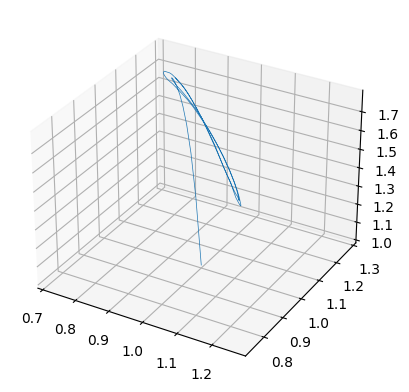

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(sol.y[0,:],sol.y[1,:],sol.y[2,:],linewidth=0.5)


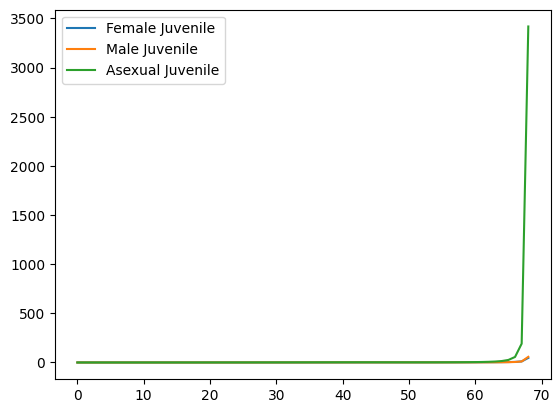

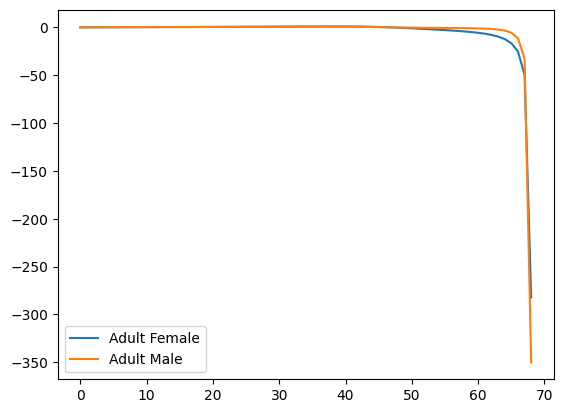

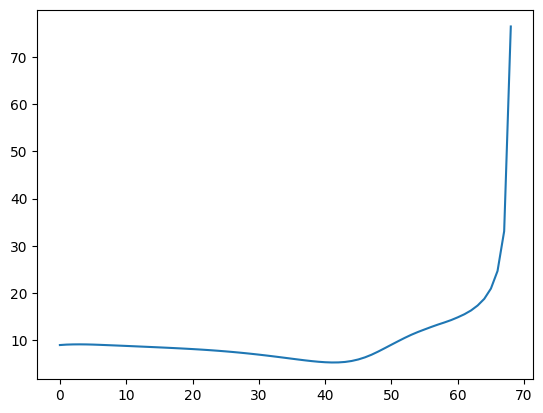

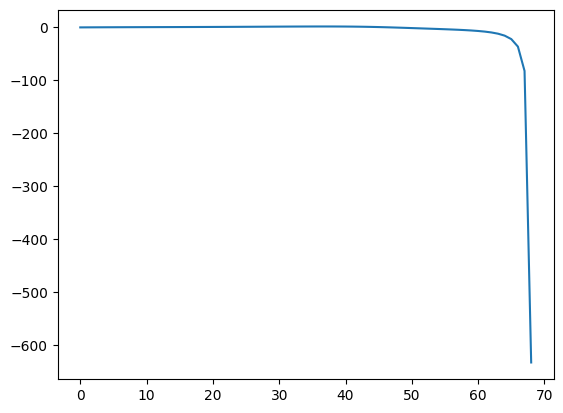

In [89]:
'''New lamprey dynamics'''

y0 = [0.1,0.1,0.1,0.1,0.1,9] #FJ,MJ,AJ,LF,LM,P
t = [0,400]

def food(t):
    return 0.5 * np.abs(np.cos(2*np.pi/100 * t)) + 0.2
    #return 0.5

par = {
'mu_JL_f':0.04,
'mu_JL_m':0.04,
'mu_JL_a':0.05,
'mu_L':0.1,
'mu_P':0.01,
'alpha':0.2,
'beta':0.5,
'gamma':0.35,
'eta':0.5,
'F':food
}

def Lamprey(t,y,par):
    JL_f,JL_m,JL_A,L_f,L_m,P = y

    '''Juveniles'''
    dJL_f = 0.1 * (par['F'](int(t))) * JL_A - par['mu_JL_f'] * JL_f 
    dJL_m = 0.1 * (1-par['F'](int(t))) * JL_A - par['mu_JL_m'] * JL_m 
    dJL_A = par['alpha'] * (L_m * L_f) - par['mu_JL_a'] * JL_A 

    '''Adults'''
    dL_f = par['beta'] * JL_f * (1-JL_f) - par['mu_L'] * L_f
    dL_m = par['beta'] * JL_m * (1- JL_m) - par['mu_L'] * L_m

    '''Prey Fish'''
    dP = par['gamma'] * P*(1-P/10) - par['eta'] * (L_m + L_f) - par['mu_P'] * P

    return np.array([dJL_f,dJL_m,dJL_A,dL_f,dL_m,dP])

sol = solve_ivp(fun=lambda t,y :Lamprey(t,y,par),t_span=t,y0=y0,t_eval=np.linspace(0,t[1],t[1]))

labels = ['Female Juvenile','Male Juvenile','Asexual Juvenile','Adult Female','Adult Male','Prey Fish']

for i in range(0,3):
    plt.plot(sol.y[i,:],label = labels[i])
plt.legend()
plt.show()

for i in range(3,5):
    plt.plot(sol.y[i,:],label = labels[i])
plt.legend()
plt.show()

plt.plot(sol.y[5,:],label = labels[5])
plt.show()

plt.plot(sol.y[3,:]+sol.y[4,:],label="Total Lamprey Population")
plt.show()
